In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, BatchNormalization
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle
from sklearn.preprocessing import MultiLabelBinarizer



In [ ]:
pathToData = "drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Multi Split/"
print(pathToData + "train_X.p")

drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Multi Split/train_X.p


In [ ]:
mlb = MultiLabelBinarizer()
# load the train dataset
X_train = pickle.load(open(pathToData+"train_X.p", 'rb'))
y_trainUnflat = pickle.load(open(pathToData+"train_Y.p", 'rb'))
y_train = y_trainUnflat.reshape(y_trainUnflat.shape[0],-1)
y_train = mlb.fit_transform(y_train)

print(X_train.shape)
print(y_train.shape)

# load the dev dataset
X_dev = pickle.load(open(pathToData+"dev_X.p", 'rb'))
y_devUnflat = pickle.load(open(pathToData+"dev_Y.p", 'rb'))
y_dev = y_devUnflat.reshape(y_devUnflat.shape[0],-1)
y_dev = mlb.fit_transform(y_dev)

print(X_dev.shape)
print(y_dev.shape)

# load the test dataset
X_test = pickle.load(open(pathToData+"test_X.p", 'rb'))
y_testUnflat = pickle.load(open(pathToData+"test_Y.p", 'rb'))
y_test = y_testUnflat.reshape(y_testUnflat.shape[0],-1)
y_test = mlb.fit_transform(y_test)

print(X_test.shape)
print(y_test.shape)


(4246, 208, 160, 3)
(4246, 3)
(910, 208, 160, 3)
(910, 3)
(910, 208, 160, 3)
(910, 3)


In [ ]:
print(y_trainUnflat)

[0 2 1 ... 0 1 0]


In [ ]:
numExamples = X_train.shape[0]
print(numExamples)

4246


In [ ]:
print(X_train.shape[1:])

(208, 160, 3)


In [ ]:
print(y_test)

[[0 1 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [1 0 0]
 [0 1 0]]


In [ ]:
#HYPERPARAMETER SEARCH OVER EPOCH NUMBER and BATCH SIZE
#We keep number of layers, neuron per layer, activation in each layer constant
batchSizes = [100,200,300]

print(batchSizes)
numEpochs = 30

[100, 200, 300]


In [ ]:
trainAccuracy = []
valAccuracy = []
trainLoss = []
valLoss = []

for batchSize in batchSizes:
  print("BatchSize : ", batchSize)
  model = Sequential()

  model.add(Conv2D(32, kernel_size=5, padding="same", input_shape= X_train.shape[1:], activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

  model.add(Conv2D(64, kernel_size=5, padding="same", activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

  model.add(Conv2D(64, kernel_size=5, padding="same", activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

  model.add(Conv2D(128, kernel_size=5, padding="same", activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

  model.add(Conv2D(256, kernel_size=5, padding="same", activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

  model.add(Flatten())

  model.add(Dense(5120, activation="relu"))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
  history = model.fit(X_train, y_train, epochs=numEpochs, batch_size=batchSize, validation_data = (X_dev, y_dev))
  historyDict = history.history
  #print(historyDict)
  trainAccuracy.append(historyDict['categorical_accuracy'])
  valAccuracy.append(historyDict['val_categorical_accuracy'])
  trainLoss.append(historyDict['loss'])
  valLoss.append(historyDict['val_loss'])
  



BatchSize :  100
Epoch 1/30
43/43 [==============================] - 30s 353ms/step - loss: 6.4814 - categorical_accuracy: 0.4560 - val_loss: 18.9118 - val_categorical_accuracy: 0.2022
Epoch 2/30
43/43 [==============================] - 13s 292ms/step - loss: 1.0176 - categorical_accuracy: 0.5094 - val_loss: 1.4979 - val_categorical_accuracy: 0.3099
Epoch 3/30
43/43 [==============================] - 13s 293ms/step - loss: 0.9573 - categorical_accuracy: 0.5433 - val_loss: 1.1653 - val_categorical_accuracy: 0.4802
Epoch 4/30
43/43 [==============================] - 13s 294ms/step - loss: 0.9336 - categorical_accuracy: 0.5445 - val_loss: 1.0251 - val_categorical_accuracy: 0.5308
Epoch 5/30
43/43 [==============================] - 13s 295ms/step - loss: 0.8969 - categorical_accuracy: 0.5784 - val_loss: 1.0068 - val_categorical_accuracy: 0.5022
Epoch 6/30
43/43 [==============================] - 13s 297ms/step - loss: 0.8403 - categorical_accuracy: 0.6138 - val_loss: 0.8994 - val_categoric

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


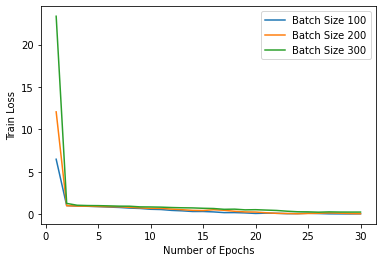

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yTrainLoss = trainLoss
#Train Loss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainLoss[i],label=labelName)
#pyplot.xlim([1,2])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Loss")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


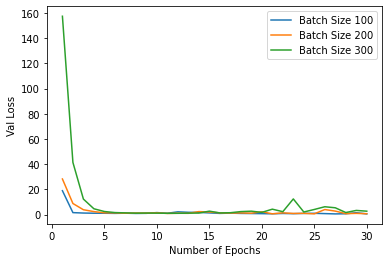

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss
#Val Loss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label=labelName)
#pyplot.xlim([1, 2])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Loss")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


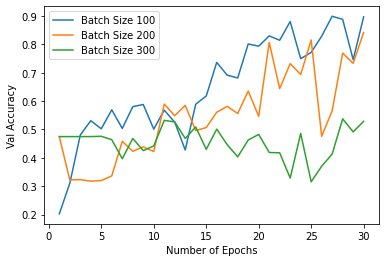

In [ ]:
#For Accuracy Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValAcc = valAccuracy
#Val Accuracies
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValAcc[i],label=labelName)

#pyplot.ylim([0.6,1])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Accuracy")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


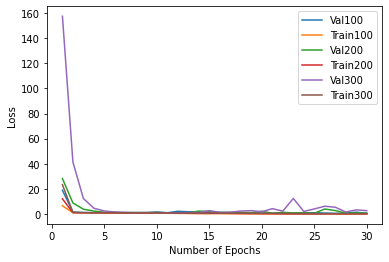

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label="Val"+str(currBatchSize))
  pyplot.plot(x, yTrainLoss[i],label="Train"+str(currBatchSize))

#pyplot.xlim([5,30])
#pyplot.ylim([0,2])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Loss")
pyplot.show()

In [ ]:
print(len(yValLoss))
#batch 100 is index 0
yValLoss100 = yValLoss[0]
print(len(yValLoss100))

print(len(yTrainLoss))
#batch 100 is index 0
yTrainLoss100 = yTrainLoss[0]
print(len(yTrainLoss100))

3
30
3
30


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


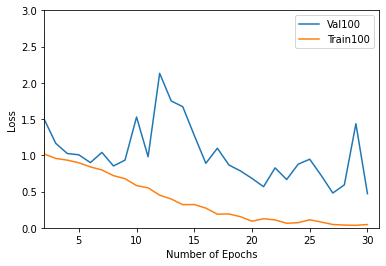

In [ ]:
x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss

currBatchSize = batchSizes[0]
labelName = "Batch Size " + str(currBatchSize)
pyplot.plot(x, yValLoss100,label="Val"+str(currBatchSize))
pyplot.plot(x, yTrainLoss100,label="Train"+str(currBatchSize))

pyplot.xlim([2,31])
pyplot.ylim([0,3])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Loss")
pyplot.show()

In [ ]:
print(yValLoss100[25])
print(yValLoss100[26])
print(yValLoss100[27])
print(yValLoss100[28])
print(yValLoss100[29])

0.7210714817047119
0.47949936985969543
0.5927301645278931
1.43586266040802
0.4708038866519928


In [ ]:

bestEpochs = 26
bestBatchSize = 100

In [ ]:
bestmodel = Sequential()

bestmodel.add(Conv2D(32, kernel_size=5, padding="same", input_shape= X_train.shape[1:], activation = "relu"))
bestmodel.add(BatchNormalization())
bestmodel.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

bestmodel.add(Conv2D(64, kernel_size=5, padding="same", activation = "relu"))
bestmodel.add(BatchNormalization())
bestmodel.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

bestmodel.add(Conv2D(64, kernel_size=5, padding="same", activation = "relu"))
bestmodel.add(BatchNormalization())
bestmodel.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

bestmodel.add(Conv2D(128, kernel_size=5, padding="same", activation = "relu"))
bestmodel.add(BatchNormalization())
bestmodel.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

bestmodel.add(Conv2D(256, kernel_size=5, padding="same", activation = "relu"))
bestmodel.add(BatchNormalization())
bestmodel.add(MaxPooling2D(pool_size=3, padding="valid", strides=(2,2)))

bestmodel.add(Flatten())

bestmodel.add(Dense(5120, activation="relu"))
bestmodel.add(Dense(3, activation='softmax'))
bestmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
bestmodel.fit(X_train, y_train, epochs=bestEpochs, batch_size=bestBatchSize, validation_data = (X_dev, y_dev))

Epoch 1/26
43/43 [==============================] - 14s 305ms/step - loss: 7.3382 - categorical_accuracy: 0.4482 - val_loss: 7.1159 - val_categorical_accuracy: 0.4571
Epoch 2/26
43/43 [==============================] - 13s 298ms/step - loss: 0.9511 - categorical_accuracy: 0.5374 - val_loss: 1.4942 - val_categorical_accuracy: 0.3363
Epoch 3/26
43/43 [==============================] - 13s 299ms/step - loss: 0.9205 - categorical_accuracy: 0.5568 - val_loss: 1.0371 - val_categorical_accuracy: 0.5088
Epoch 4/26
43/43 [==============================] - 13s 311ms/step - loss: 0.8729 - categorical_accuracy: 0.5900 - val_loss: 1.0536 - val_categorical_accuracy: 0.5176
Epoch 5/26
43/43 [==============================] - 13s 298ms/step - loss: 0.8217 - categorical_accuracy: 0.6220 - val_loss: 1.0547 - val_categorical_accuracy: 0.5319
Epoch 6/26
43/43 [==============================] - 13s 298ms/step - loss: 0.7920 - categorical_accuracy: 0.6458 - val_loss: 0.9605 - val_categorical_accuracy: 0.546

In [ ]:
predictions = bestmodel.predict(X_test)


In [ ]:
yTestNew = y_test.argmax(axis=1)
yPredNew = predictions.argmax(axis=1)

# print(yTestNew)
# print(yPredNew)

0.7794282936393323


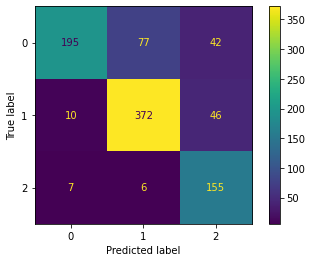

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

cM = confusion_matrix(yTestNew,yPredNew)

displayClasses = [i for i in range(3)]

print(f1_score(yTestNew, yPredNew, average='macro'))

disp = ConfusionMatrixDisplay(confusion_matrix=cM, display_labels=displayClasses)
disp.plot()
pyplot.show()